# Parameter Distributions Analysis

**Goal**: Explore the distribution of key architectural parameters across the model ecosystem.

**Key Questions**:
1. What hidden sizes are most common?
2. How deep are models (num_hidden_layers)?
3. What's the distribution of vocabulary sizes?
4. How have context lengths evolved?
5. Are there parameter correlations we can observe?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

In [2]:
df = pd.read_csv('../data/model_configs_expanded.csv', low_memory=False)
print(f"Total models: {len(df):,}")

Total models: 14,557


## 1. Hidden Size Distribution

In [ ]:
hidden_sizes = df['config_hidden_size'].dropna()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(hidden_sizes, bins=50, color='steelblue', edgecolor='white', alpha=0.7)
axes[0].axvline(hidden_sizes.median(), color='red', linestyle='--', linewidth=2, label=f'Median: {hidden_sizes.median():.0f}')
axes[0].axvline(hidden_sizes.mean(), color='orange', linestyle='--', linewidth=2, label=f'Mean: {hidden_sizes.mean():.0f}')
axes[0].set_xlabel('Hidden Size')
axes[0].set_ylabel('Count')
axes[0].set_title('Hidden Size Distribution', fontsize=13)
axes[0].legend()

# Log scale histogram to see the range better
axes[1].hist(hidden_sizes, bins=50, color='steelblue', edgecolor='white', alpha=0.7)
axes[1].set_yscale('log')
axes[1].set_xlabel('Hidden Size')
axes[1].set_ylabel('Count (log scale)')
axes[1].set_title('Hidden Size Distribution (Log Scale)', fontsize=13)

plt.tight_layout()
plt.savefig('figures/hidden_size_dist.png', dpi=150, bbox_inches='tight')
plt.show()

# Common hidden sizes
print("\nMost common hidden sizes:")
print(hidden_sizes.value_counts().head(10))

## 2. Number of Layers Distribution

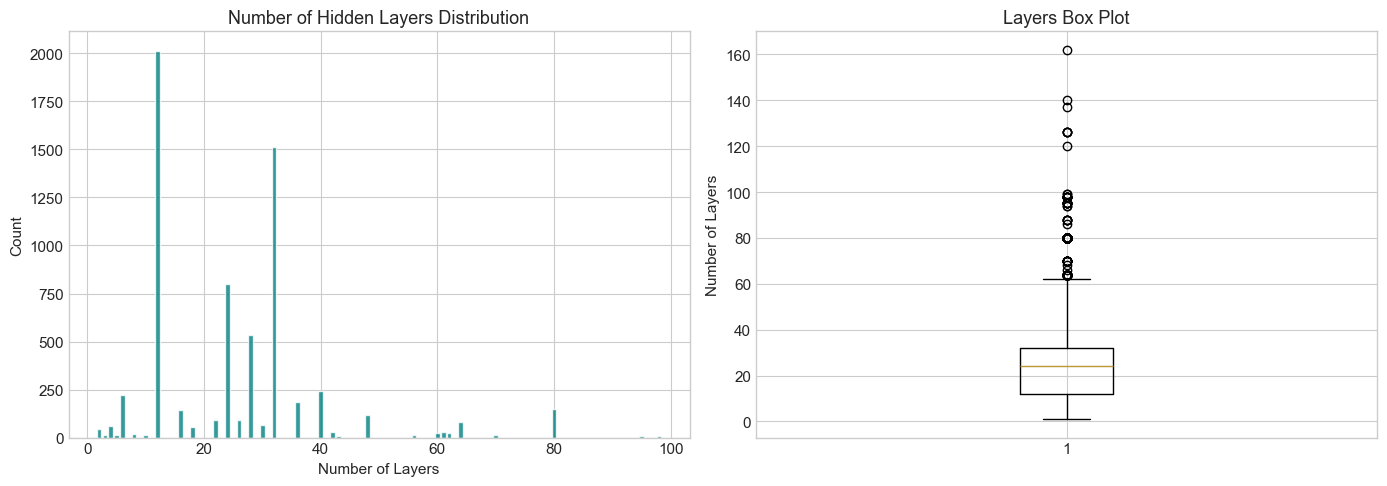


Layer statistics:
  Min: 1
  Max: 162
  Median: 24
  Mean: 25.5

Most common layer counts:
config_num_hidden_layers
12.0    2014
32.0    1511
24.0     798
28.0     535
40.0     245
6.0      223
36.0     183
80.0     150
16.0     145
48.0     117
Name: count, dtype: int64


In [ ]:
layers = pd.to_numeric(df['config_num_hidden_layers'], errors='coerce').dropna()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot for discrete values
layer_counts = layers.value_counts().sort_index()
# Take top 30 most common
top_layers = layers.value_counts().head(30).sort_index()

# Convert index to int (handle float strings by converting to numeric first)
# Ensure index is numeric, then convert to int
x_pos = pd.to_numeric(top_layers.index, errors='coerce')
# Drop any NaN values that couldn't be converted
valid_mask = ~pd.isna(x_pos)
x_pos = x_pos[valid_mask].astype(int)
top_layers_values = top_layers.values[valid_mask]
axes[0].bar(x_pos, top_layers_values, color='teal', edgecolor='white', alpha=0.8)
axes[0].set_xlabel('Number of Layers')
axes[0].set_ylabel('Count')
axes[0].set_title('Number of Hidden Layers Distribution', fontsize=13)

# Box plot
axes[1].boxplot(layers, vert=True)
axes[1].set_ylabel('Number of Layers')
axes[1].set_title('Layers Box Plot', fontsize=13)

plt.tight_layout()
plt.savefig('figures/num_layers_dist.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nLayer statistics:")
print(f"  Min: {layers.min():.0f}")
print(f"  Max: {layers.max():.0f}")
print(f"  Median: {layers.median():.0f}")
print(f"  Mean: {layers.mean():.1f}")
print("\nMost common layer counts:")
print(layers.value_counts().head(10))

## 3. Vocabulary Size Distribution

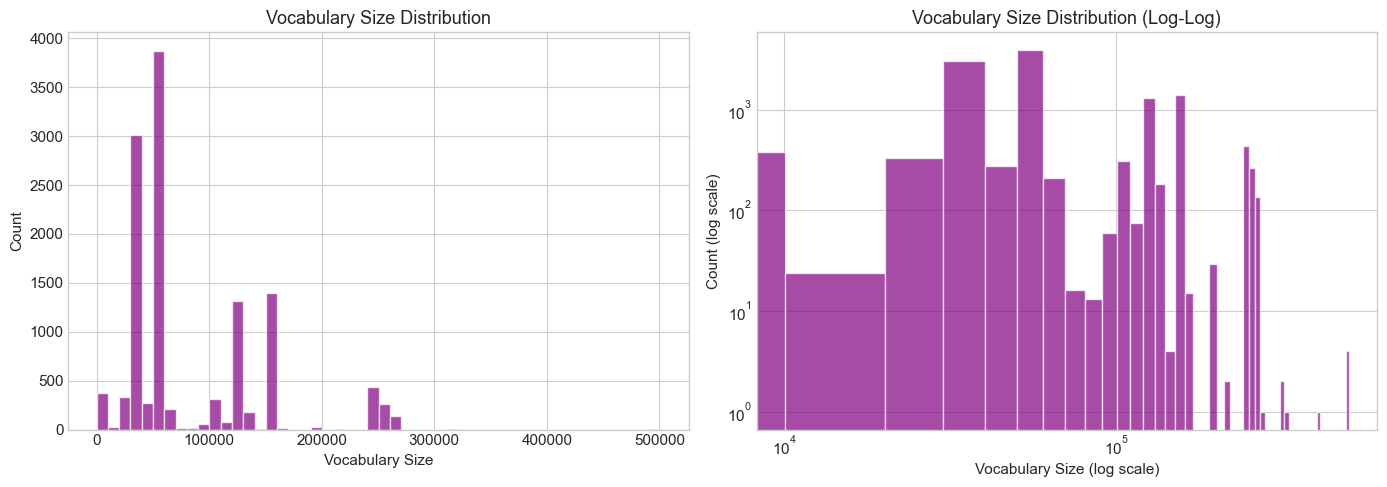


Vocabulary size statistics:
  Min: 0
  Max: 501,153
  Median: 50,257

Most common vocab sizes:
config_vocab_size
50257.0     2801
128256.0    1104
32000.0     1077
30522.0      776
151936.0     746
152064.0     547
32128.0      344
50265.0      335
250002.0     286
51865.0      202
Name: count, dtype: int64


In [ ]:
# Convert to numeric, coercing errors to NaN
vocab = pd.to_numeric(df['config_vocab_size'], errors='coerce').dropna()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Regular histogram
axes[0].hist(vocab, bins=50, color='purple', edgecolor='white', alpha=0.7)
axes[0].set_xlabel('Vocabulary Size')
axes[0].set_ylabel('Count')
axes[0].set_title('Vocabulary Size Distribution', fontsize=13)

# Log-log to see the full range
axes[1].hist(vocab, bins=50, color='purple', edgecolor='white', alpha=0.7)
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_xlabel('Vocabulary Size (log scale)')
axes[1].set_ylabel('Count (log scale)')
axes[1].set_title('Vocabulary Size Distribution (Log-Log)', fontsize=13)

plt.tight_layout()
plt.savefig('figures/vocab_size_dist.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nVocabulary size statistics:")
print(f"  Min: {vocab.min():,.0f}")
print(f"  Max: {vocab.max():,.0f}")
print(f"  Median: {vocab.median():,.0f}")
print("\nMost common vocab sizes:")
print(vocab.value_counts().head(10))

## 4. Context Length (Max Position Embeddings) Distribution

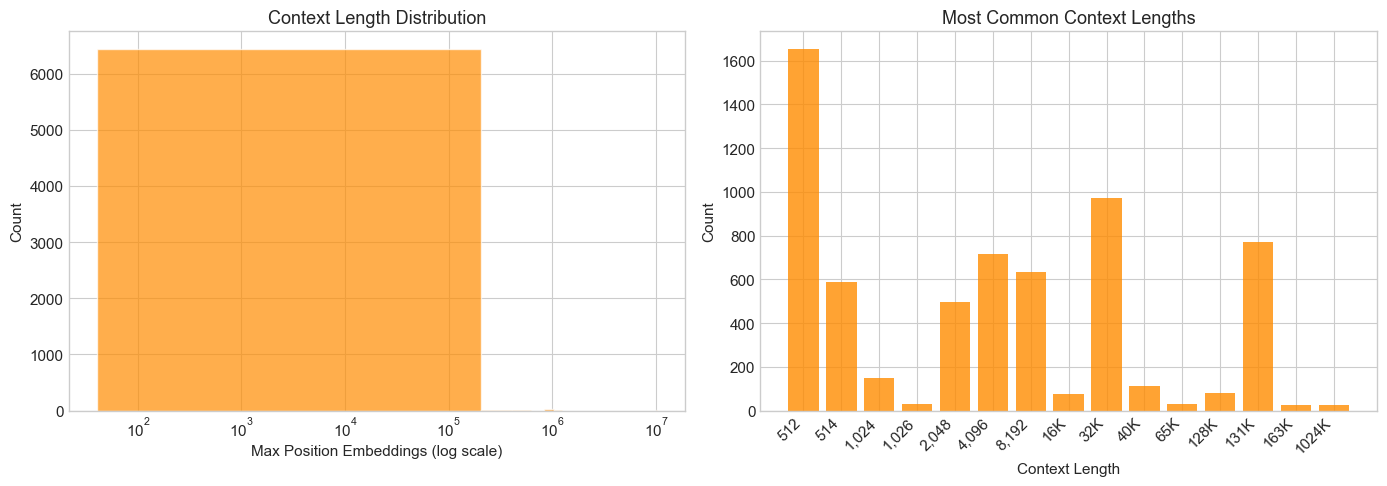


Context length statistics:
  Min: 40
  Max: 10,240,000
  Median: 4,096

Most common context lengths:
config_max_position_embeddings
512.0       1652
32768.0      970
131072.0     771
4096.0       714
8192.0       632
514.0        589
2048.0       497
1024.0       151
40960.0      111
128000.0      81
Name: count, dtype: int64


In [ ]:
# Convert to numeric, coercing errors to NaN
context = pd.to_numeric(df['config_max_position_embeddings'], errors='coerce').dropna()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Log scale histogram
axes[0].hist(context, bins=50, color='darkorange', edgecolor='white', alpha=0.7)
axes[0].set_xscale('log')
axes[0].set_xlabel('Max Position Embeddings (log scale)')
axes[0].set_ylabel('Count')
axes[0].set_title('Context Length Distribution', fontsize=13)

# Common context lengths bar chart
context_counts = context.value_counts().head(15).sort_index()
labels = [f"{int(v):,}" if v < 10000 else f"{int(v/1000)}K" for v in context_counts.index]
axes[1].bar(range(len(context_counts)), context_counts.values, color='darkorange', alpha=0.8)
axes[1].set_xticks(range(len(context_counts)))
axes[1].set_xticklabels(labels, rotation=45, ha='right')
axes[1].set_xlabel('Context Length')
axes[1].set_ylabel('Count')
axes[1].set_title('Most Common Context Lengths', fontsize=13)

plt.tight_layout()
plt.savefig('figures/context_length_dist.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nContext length statistics:")
print(f"  Min: {context.min():,.0f}")
print(f"  Max: {context.max():,.0f}")
print(f"  Median: {context.median():,.0f}")
print("\nMost common context lengths:")
print(context.value_counts().head(10))

## 5. Attention Heads Distribution

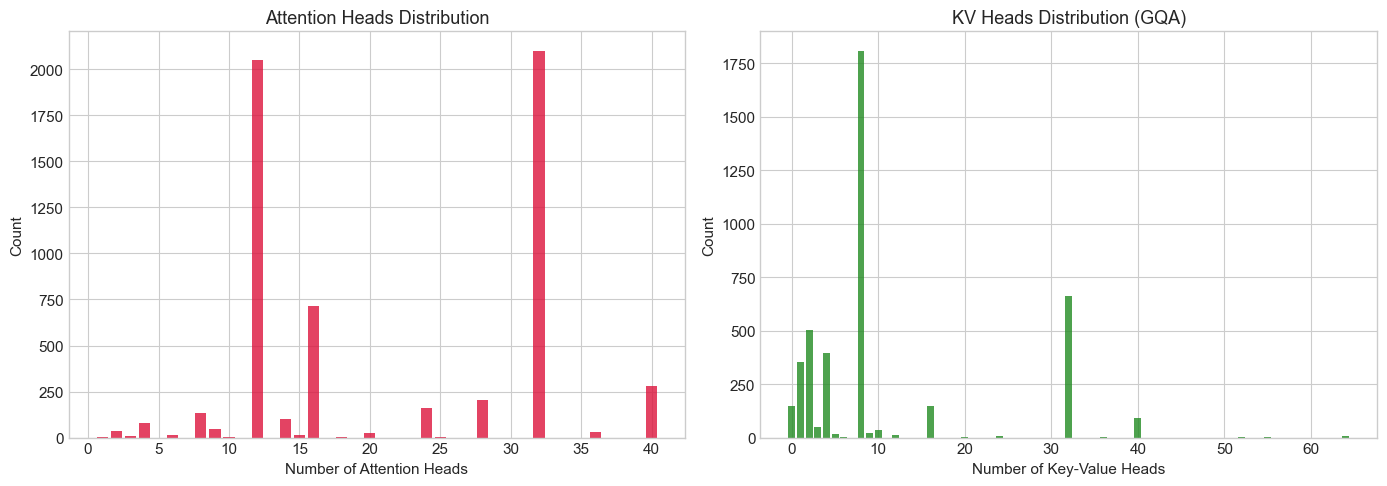


Most common attention head counts:
config_num_attention_heads
32.0        2101
12.0        2049
16.0         716
131072.0     518
32768.0      347
40.0         278
8192.0       222
64.0         207
28.0         202
24.0         161
Name: count, dtype: int64

Most common KV head counts (GQA):
config_num_key_value_heads
8.0         1808
32.0         660
2.0          501
4.0          395
1.0          354
151643.0     347
128000.0     318
0.0          148
16.0         147
50256.0       94
Name: count, dtype: int64


In [ ]:
# Convert to numeric, coercing errors to NaN
heads = pd.to_numeric(df['config_num_attention_heads'], errors='coerce').dropna()
kv_heads = pd.to_numeric(df['config_num_key_value_heads'], errors='coerce').dropna()

if len(heads) == 0:
    print("⚠ No attention heads data available")
else:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Attention heads
    head_counts = heads.value_counts().sort_index().head(20)
    axes[0].bar(head_counts.index.astype(int), head_counts.values, color='crimson', alpha=0.8)
    axes[0].set_xlabel('Number of Attention Heads')
    axes[0].set_ylabel('Count')
    axes[0].set_title('Attention Heads Distribution', fontsize=13)
    
    # KV heads (for GQA)
    if len(kv_heads) > 0:
        kv_counts = kv_heads.value_counts().sort_index().head(20)
        axes[1].bar(kv_counts.index.astype(int), kv_counts.values, color='forestgreen', alpha=0.8)
        axes[1].set_xlabel('Number of Key-Value Heads')
        axes[1].set_ylabel('Count')
        axes[1].set_title('KV Heads Distribution (GQA)', fontsize=13)
    else:
        axes[1].text(0.5, 0.5, 'No KV heads data', ha='center', va='center', transform=axes[1].transAxes)
        axes[1].set_title('KV Heads Distribution (GQA)', fontsize=13)
    
    plt.tight_layout()
    plt.savefig('figures/attention_heads_dist.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("\nMost common attention head counts:")
    print(heads.value_counts().head(10))
    if len(kv_heads) > 0:
        print("\nMost common KV head counts (GQA):")
        print(kv_heads.value_counts().head(10))

## 6. RoPE Theta Distribution

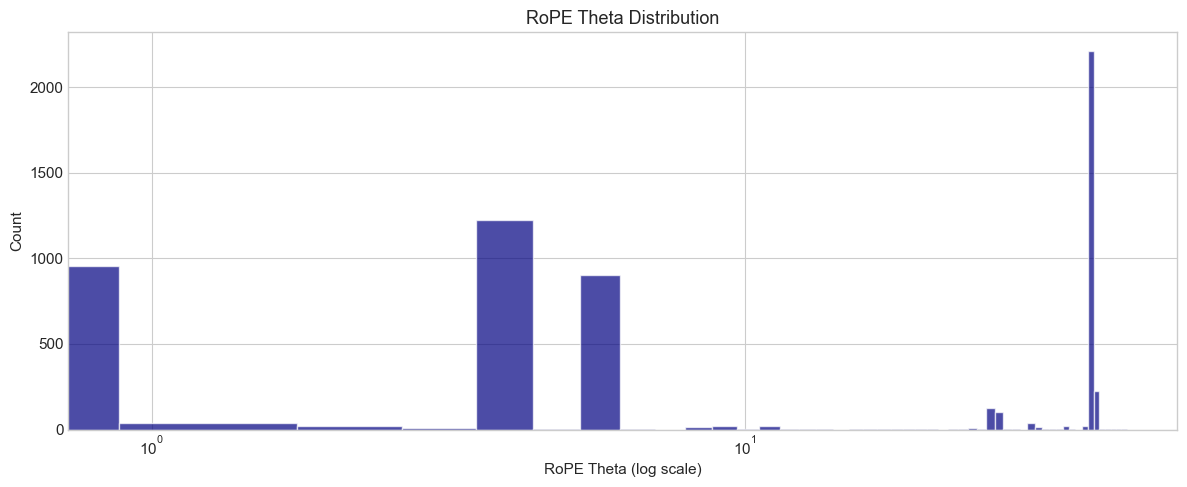


Most common RoPE theta values:
config_rope_theta
False        2209
10000.0      1224
1000000.0     958
500000.0      902
True          227
10000         129
1000000       103
5000000.0      38
100000         36
100000.0       23
Name: count, dtype: int64


In [ ]:
rope_theta = df['config_rope_theta'].dropna()

fig, ax = plt.subplots(figsize=(12, 5))

# Log scale histogram
ax.hist(rope_theta, bins=50, color='navy', edgecolor='white', alpha=0.7)
ax.set_xscale('log')
ax.set_xlabel('RoPE Theta (log scale)')
ax.set_ylabel('Count')
ax.set_title('RoPE Theta Distribution', fontsize=13)

plt.tight_layout()
plt.savefig('figures/rope_theta_dist.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nMost common RoPE theta values:")
print(rope_theta.value_counts().head(10))

## 7. Parameter Correlations

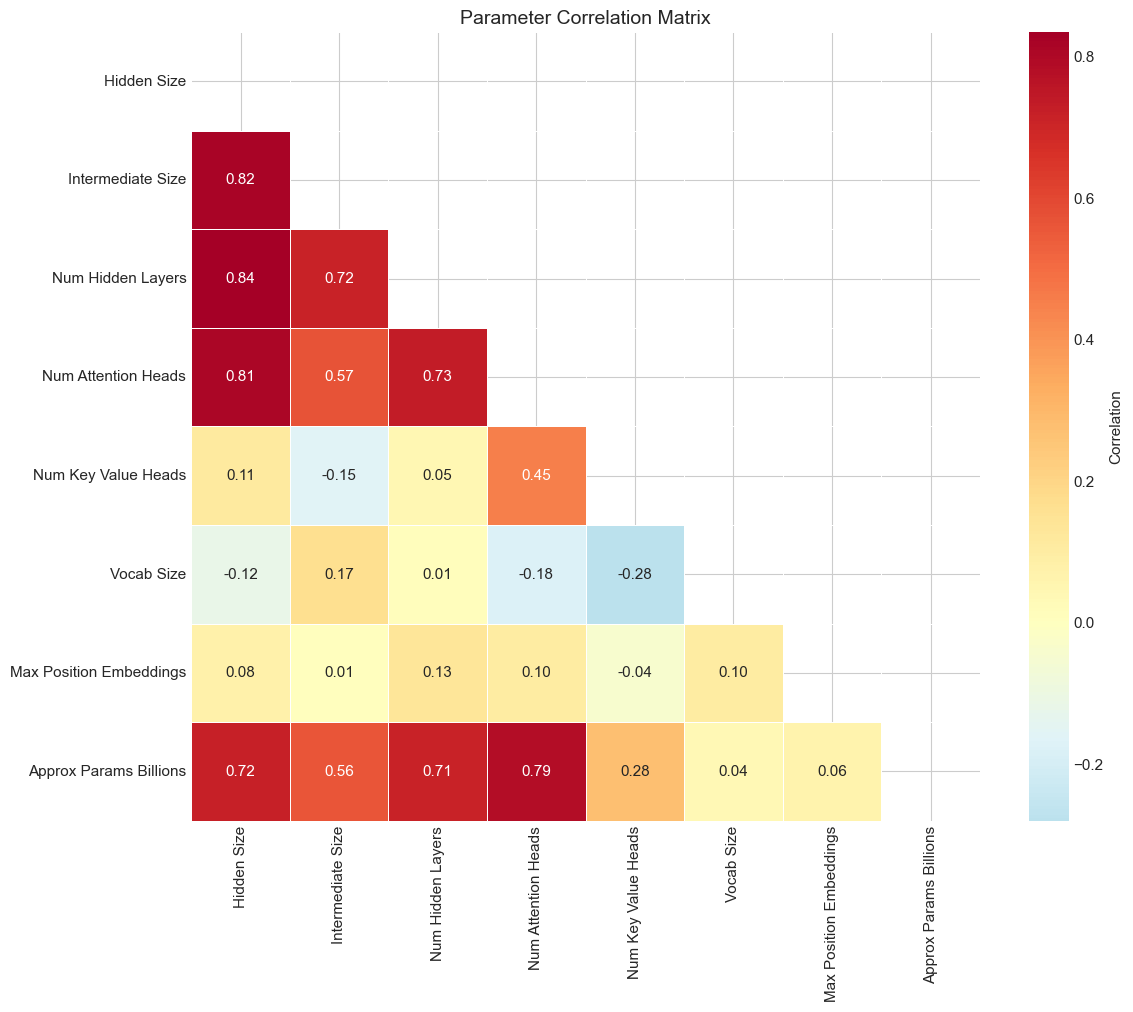

In [ ]:
# Select numeric columns for correlation analysis
corr_cols = [
    'config_hidden_size', 'config_intermediate_size', 'config_num_hidden_layers',
    'config_num_attention_heads', 'config_num_key_value_heads', 'config_vocab_size',
    'config_max_position_embeddings', 'config_approx_params_billions'
]

# Extract columns and convert to numeric (handles string values like 'True')
df_corr = df[corr_cols].copy()
for col in corr_cols:
    df_corr[col] = pd.to_numeric(df_corr[col], errors='coerce')

# Drop rows with any NaN values after conversion
df_corr = df_corr.dropna()

# Rename columns for cleaner display
rename_map = {c: c.replace('config_', '').replace('_', ' ').title() for c in corr_cols}
df_corr_renamed = df_corr.rename(columns=rename_map)

# Calculate correlation matrix
corr_matrix = df_corr_renamed.corr()

fig, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdYlBu_r',
            center=0, square=True, linewidths=0.5, ax=ax,
            cbar_kws={'label': 'Correlation'})
ax.set_title('Parameter Correlation Matrix', fontsize=14)

plt.tight_layout()
plt.savefig('figures/parameter_correlations.png', dpi=150, bbox_inches='tight')
plt.show()

## 8. Scaling Relationships

TypeError: can only concatenate str (not "float") to str

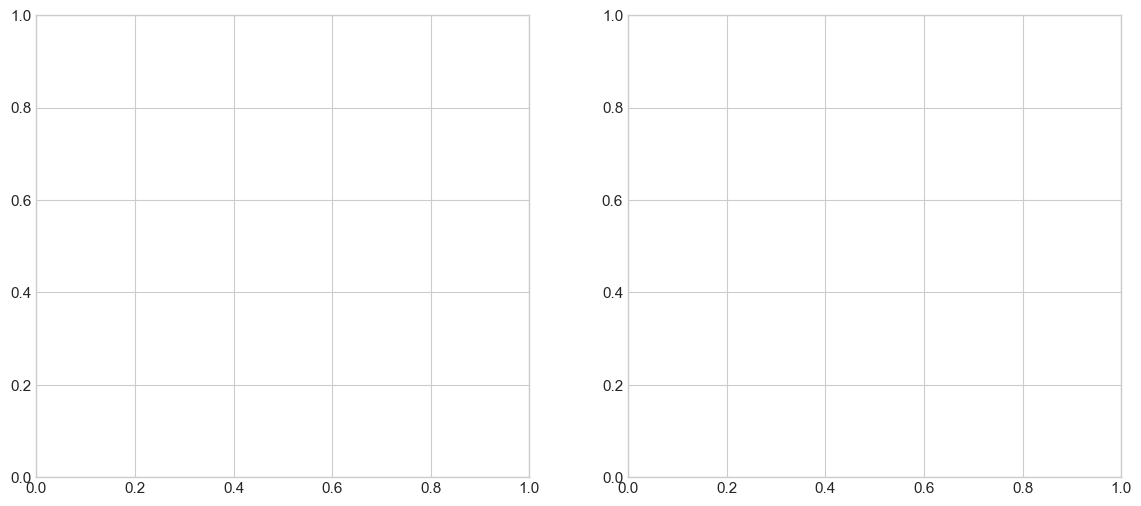

In [ ]:
# Hidden size vs Num Layers (classic depth vs width tradeoff)
df_scaling = df[['config_hidden_size', 'config_num_hidden_layers', 
                  'config_intermediate_size', 'config_approx_params_billions']].copy()

# Convert all columns to numeric explicitly
for col in df_scaling.columns:
    df_scaling[col] = pd.to_numeric(df_scaling[col], errors='coerce')

# Drop rows with any NaN values after conversion
df_scaling = df_scaling.dropna()

# Ensure all columns are float64 (not object dtype)
for col in df_scaling.columns:
    if df_scaling[col].dtype == 'object':
        df_scaling[col] = pd.to_numeric(df_scaling[col], errors='coerce')
    df_scaling[col] = df_scaling[col].astype(float)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Hidden size vs Layers
# Convert params to numpy array for arithmetic operations
params_array = df_scaling['config_approx_params_billions'].values.astype(float)
params_for_color = np.log10(params_array + 0.001)

scatter = axes[0].scatter(df_scaling['config_num_hidden_layers'].values, 
                          df_scaling['config_hidden_size'].values,
                          c=params_for_color,
                          cmap='viridis', alpha=0.6, s=20)
axes[0].set_xlabel('Number of Layers')
axes[0].set_ylabel('Hidden Size')
axes[0].set_title('Depth vs Width (colored by log params)', fontsize=13)
plt.colorbar(scatter, ax=axes[0], label='Log10(Params B)')

# FFN expansion ratio
df_scaling['ffn_ratio'] = df_scaling['config_intermediate_size'] / df_scaling['config_hidden_size']
valid_ffn = df_scaling[df_scaling['ffn_ratio'].between(1, 10)]['ffn_ratio']

axes[1].hist(valid_ffn, bins=50, color='mediumpurple', edgecolor='white', alpha=0.7)
axes[1].axvline(valid_ffn.median(), color='red', linestyle='--', linewidth=2, 
                label=f'Median: {valid_ffn.median():.2f}')
axes[1].set_xlabel('FFN Expansion Ratio (intermediate_size / hidden_size)')
axes[1].set_ylabel('Count')
axes[1].set_title('FFN Expansion Ratio Distribution', fontsize=13)
axes[1].legend()

plt.tight_layout()
plt.savefig('figures/scaling_relationships.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nFFN expansion ratio statistics:")
print(f"  Median: {valid_ffn.median():.2f}")
print(f"  Mean: {valid_ffn.mean():.2f}")
print(f"  Most common: {valid_ffn.round(1).value_counts().head(5).to_dict()}")

## 9. Head Dimension Analysis

In [ ]:
# Convert to numeric
head_dim = pd.to_numeric(df['config_head_dimension'], errors='coerce').dropna()
gqa_ratio = pd.to_numeric(df['config_gqa_ratio'], errors='coerce').dropna()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Head dimension distribution
dim_counts = head_dim.value_counts().sort_index().head(20)
axes[0].bar(dim_counts.index.astype(int), dim_counts.values, color='coral', alpha=0.8)
axes[0].set_xlabel('Head Dimension (hidden_size / num_heads)')
axes[0].set_ylabel('Count')
axes[0].set_title('Head Dimension Distribution', fontsize=13)

# GQA ratio distribution (already converted above)
gqa_counts = gqa_ratio.value_counts().sort_index().head(15)
axes[1].bar(range(len(gqa_counts)), gqa_counts.values, color='seagreen', alpha=0.8)
axes[1].set_xticks(range(len(gqa_counts)))
axes[1].set_xticklabels([f"{x:.1f}" for x in gqa_counts.index], rotation=45)
axes[1].set_xlabel('GQA Ratio (num_heads / num_kv_heads)')
axes[1].set_ylabel('Count')
axes[1].set_title('GQA Ratio Distribution', fontsize=13)

plt.tight_layout()
plt.savefig('figures/head_dim_gqa.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nMost common head dimensions:")
print(head_dim.value_counts().head(10))
print("\nMost common GQA ratios:")
print(gqa_ratio.value_counts().head(10))

## 10. Summary Dashboard

In [ ]:
# Create a summary dashboard with key distributions
# Ensure all variables are numeric
hidden_sizes_num = pd.to_numeric(df['config_hidden_size'], errors='coerce').dropna()
layers_num = pd.to_numeric(df['config_num_hidden_layers'], errors='coerce').dropna()
vocab_num = pd.to_numeric(df['config_vocab_size'], errors='coerce').dropna()

fig = plt.figure(figsize=(16, 5))

# Hidden Size
ax1 = fig.add_subplot(1, 3, 1)
if len(hidden_sizes_num) > 0:
    ax1.hist(hidden_sizes_num, bins=30, color='steelblue', alpha=0.7)
    ax1.set_xlabel('Hidden Size')
    ax1.set_title('Hidden Size')
else:
    ax1.text(0.5, 0.5, 'No data', ha='center', va='center', transform=ax1.transAxes)
    ax1.set_title('Hidden Size')

# Num Layers
ax2 = fig.add_subplot(1, 3, 2)
if len(layers_num) > 0:
    ax2.hist(layers_num, bins=30, color='teal', alpha=0.7)
    ax2.set_xlabel('Num Layers')
    ax2.set_title('Number of Layers')
else:
    ax2.text(0.5, 0.5, 'No data', ha='center', va='center', transform=ax2.transAxes)
    ax2.set_title('Number of Layers')

# Vocab Size (log)
ax3 = fig.add_subplot(1, 3, 3)
if len(vocab_num) > 0:
    ax3.hist(vocab_num, bins=30, color='purple', alpha=0.7)
    ax3.set_xscale('log')
    ax3.set_xlabel('Vocab Size (log)')
    ax3.set_title('Vocabulary Size')
else:
    ax3.text(0.5, 0.5, 'No data', ha='center', va='center', transform=ax3.transAxes)
    ax3.set_title('Vocabulary Size')

plt.suptitle('Model Configuration Parameter Distributions', fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig('figures/parameter_dashboard.png', dpi=150, bbox_inches='tight')
plt.show()

# Print summary
print("\n✓ Dashboard created with distributions:")
print(f"  Hidden sizes: {len(hidden_sizes_num):,} models")
print(f"  Layers: {len(layers_num):,} models")
print(f"  Vocab sizes: {len(vocab_num):,} models")